In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv


In [4]:
heart_attack = pd.read_csv('/kaggle/input/heart-attack-prediction-dataset/heart_attack_prediction_dataset.csv')

In [5]:
heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
#filtering the numerical columns
heart_attack_num = heart_attack.select_dtypes(exclude=['object'])

In [7]:
heart_attack.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


<Axes: >

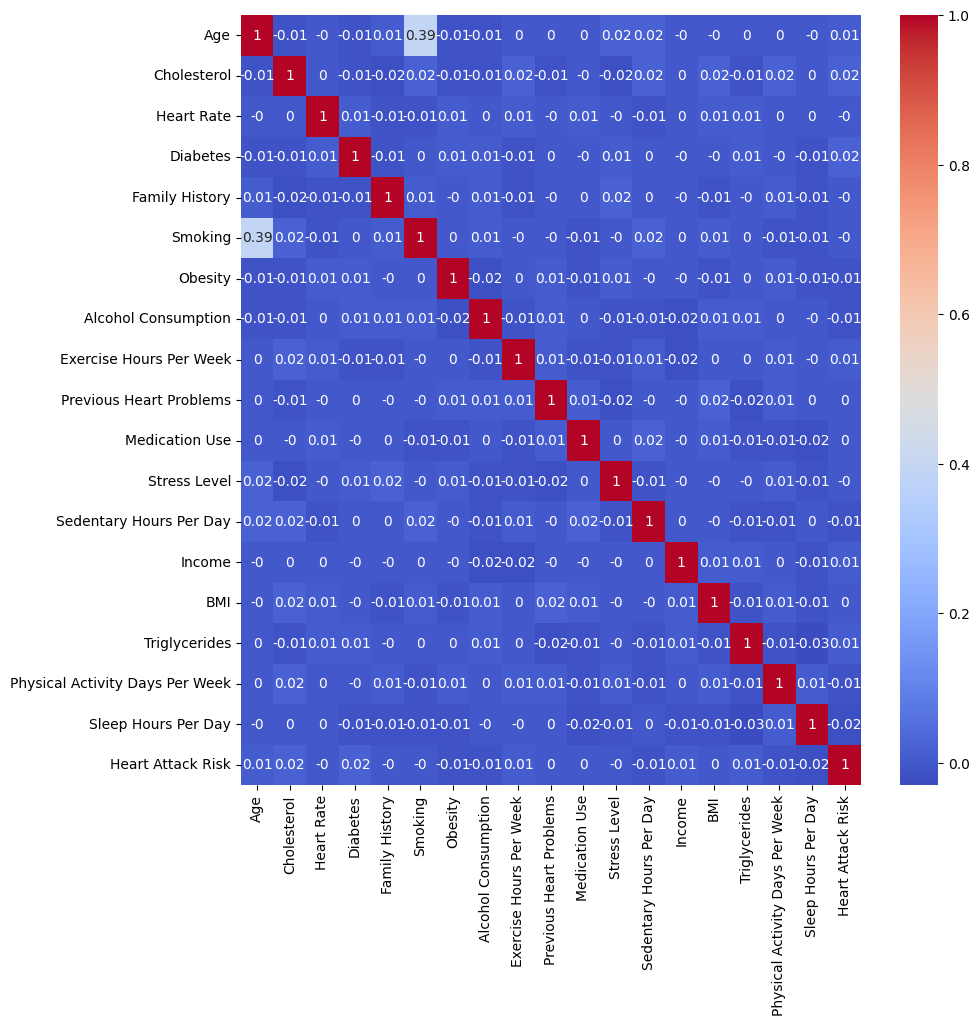

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_attack_num.corr().round(2),annot=True,cmap='coolwarm')

In [12]:
heart_attack.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

<Axes: xlabel='Sex'>

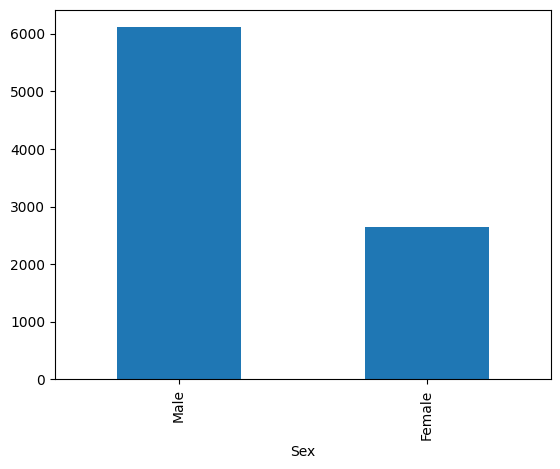

In [14]:
heart_attack['Sex'].value_counts().plot.bar()

There are significantly more male than females represented in the dataset.

In [15]:
heart_attack['Age'].value_counts(bins=10)

Age
(17.927, 25.2]    992
(82.8, 90.0]      982
(46.8, 54.0]      892
(32.4, 39.6]      884
(39.6, 46.8]      868
(25.2, 32.4]      851
(61.2, 68.4]      847
(54.0, 61.2]      834
(75.6, 82.8]      814
(68.4, 75.6]      799
Name: count, dtype: int64

highest age is 90 while the lowest is 18.

Creating a new column to use to segment the data-set by age.

In [16]:
col_bin = [0,25,35,45,60,75,100]
col_labels = ['0-25','25-35','35-45','45-60','60-75','75+']
heart_attack['Age Group'] = pd.cut(heart_attack['Age'],bins=col_bin,labels=col_labels,right=False)

Text(0.5, 1.0, 'Age Group Distribution')

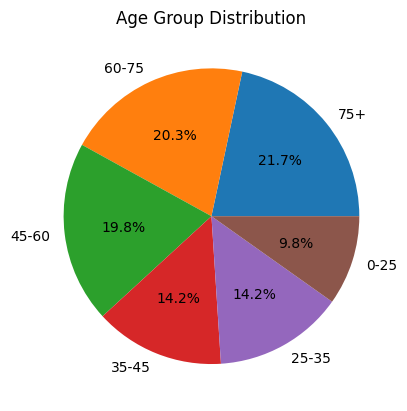

In [22]:
heart_attack['Age Group'].value_counts().plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('Age Group Distribution')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '(0-25, 1)'),
  Text(1, 0, '(0-25, 0)'),
  Text(2, 0, '(25-35, 1)'),
  Text(3, 0, '(25-35, 0)'),
  Text(4, 0, '(35-45, 1)'),
  Text(5, 0, '(35-45, 0)'),
  Text(6, 0, '(45-60, 1)'),
  Text(7, 0, '(45-60, 0)'),
  Text(8, 0, '(60-75, 1)'),
  Text(9, 0, '(60-75, 0)'),
  Text(10, 0, '(75+, 1)'),
  Text(11, 0, '(75+, 0)')])

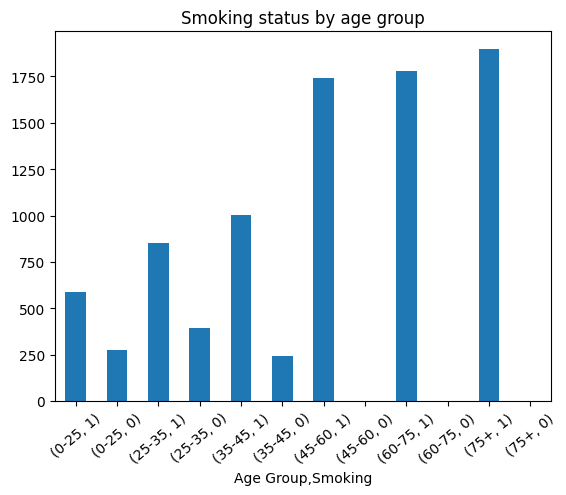

In [32]:
heart_attack.groupby('Age Group')['Smoking'].value_counts().plot.bar()
plt.title('Smoking status by age group')
plt.xticks(rotation=40)

Smoking - Smoking status of the patient (1: Smoker, 0: Non-smoker)

Patients that are older than 44 are smokers; no non smokers.

In [71]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Diet'].value_counts()

Diet
Average      1836
Healthy      1792
Unhealthy    1790
Name: count, dtype: int64

<Axes: xlabel='Stress Level'>

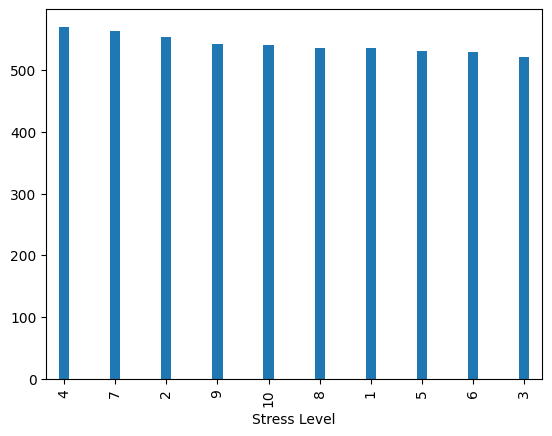

In [77]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Stress Level'].value_counts().plot.bar(width=0.2)

Stress Level - Stress level reported by the patient (1-10)

Text(0, 0.5, '')

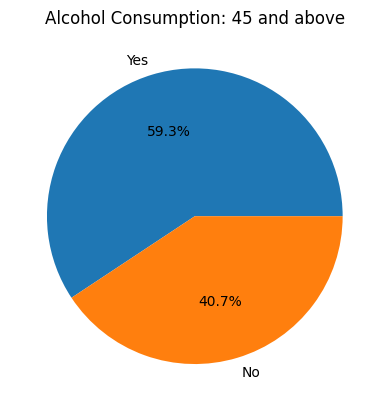

In [81]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Alcohol Consumption'].value_counts().plot.pie(autopct='%.1f%%',labels=['Yes','No'])
plt.title('Alcohol Consumption: 45 and above')
plt.ylabel('')

In [84]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Blood Pressure'].value_counts()

Blood Pressure
115/100    6
96/60      6
94/80      5
156/79     5
144/98     5
          ..
168/87     1
136/74     1
105/73     1
158/95     1
94/76      1
Name: count, Length: 3223, dtype: int64

In [86]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['BMI'].agg('mean')

28.913369203309188

In [87]:
heart_attack[~(heart_attack['Age Group'].isin(['45-60','60-75','75+']))]['BMI'].agg('mean')
#Checking BMI for age groups below 45. there isnt any difference.

28.855935987712098

In [88]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Family History'].value_counts()

Family History
0    2729
1    2689
Name: count, dtype: int64

In [89]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Previous Heart Problems'].value_counts()

Previous Heart Problems
0    2715
1    2703
Name: count, dtype: int64

I am trying to figure out why 45 and older smoke a lot.

In [91]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Medication Use'].value_counts()

Medication Use
0    2729
1    2689
Name: count, dtype: int64

In [94]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Sedentary Hours Per Day'].agg('mean')

6.035605803254616

"Sedentary hours per day" refers to the amount of time a person spends engaged in sedentary activities or behaviors during a 24-hour period. Sedentary activities are those that involve minimal physical activity or movement and typically require sitting or lying down for extended periods. These activities are characterized by low energy expenditure.

45 and older have an average of 6 hours per day.

In [95]:
heart_attack[~(heart_attack['Age Group'].isin(['45-60','60-75','75+']))]['Sedentary Hours Per Day'].agg('mean')

5.925798056516933

Not much difference between above 45 and below 45 year olds with regards to sedentary hours.

In [97]:
trigly_45_up = heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Triglycerides'].value_counts()
trigly_45_upav = np.average(trigly_45_up.index,weights=trigly_45_up.values)

In [98]:
trigly_45_upav

418.4889258028793

The average triglycerides of 45 and above age groups is 418.5 approx.

In [99]:
trigly_45_down = heart_attack[~(heart_attack['Age Group'].isin(['45-60','60-75','75+']))]['Triglycerides'].value_counts()
trigly_45_downav = np.average(trigly_45_down.index,weights=trigly_45_down.values)

In [100]:
trigly_45_downav

416.3620328849028

There isnt much of a difference in triglyceride levels between both segments of age groups; above 45 and below 45

In [34]:
heart_attack.groupby('Age Group')['Cholesterol'].agg('mean')

Age Group
0-25     258.815116
25-35    260.954069
35-45    265.217846
45-60    257.343876
60-75    259.755194
75+      258.589568
Name: Cholesterol, dtype: float64

Checking correlations with smoking column.

In [35]:
heart_attack_num.corr()['Smoking']

Age                                0.394891
Cholesterol                        0.016342
Heart Rate                        -0.012331
Diabetes                           0.000527
Family History                     0.011748
Smoking                            1.000000
Obesity                            0.003969
Alcohol Consumption                0.012754
Exercise Hours Per Week           -0.000150
Previous Heart Problems           -0.000574
Medication Use                    -0.010877
Stress Level                      -0.001757
Sedentary Hours Per Day            0.015311
Income                             0.003096
BMI                                0.007670
Triglycerides                      0.004650
Physical Activity Days Per Week   -0.006465
Sleep Hours Per Day               -0.005424
Heart Attack Risk                 -0.004051
Name: Smoking, dtype: float64

<Axes: xlabel='Alcohol Consumption'>

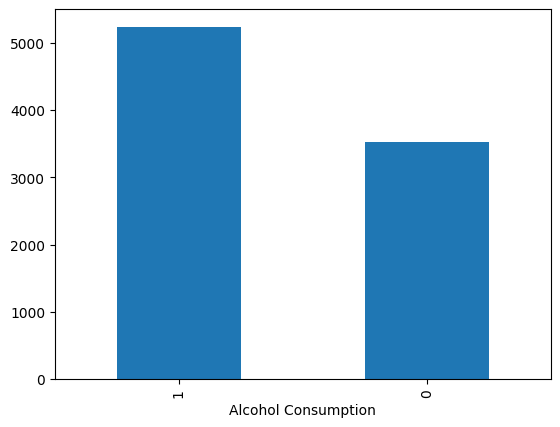

In [41]:
heart_attack['Alcohol Consumption'].value_counts().plot.bar()

Many more people consume alcohol.

In [43]:
heart_attack.groupby('Smoking')['Alcohol Consumption'].value_counts()

Smoking  Alcohol Consumption
0        1                       524
         0                       380
1        1                      4717
         0                      3142
Name: count, dtype: int64

Smoking seems to influence Alcohol consumption.

(array([0, 1, 2, 3]),
 [Text(0, 0, '(0, 0)'),
  Text(1, 0, '(0, 1)'),
  Text(2, 0, '(1, 0)'),
  Text(3, 0, '(1, 1)')])

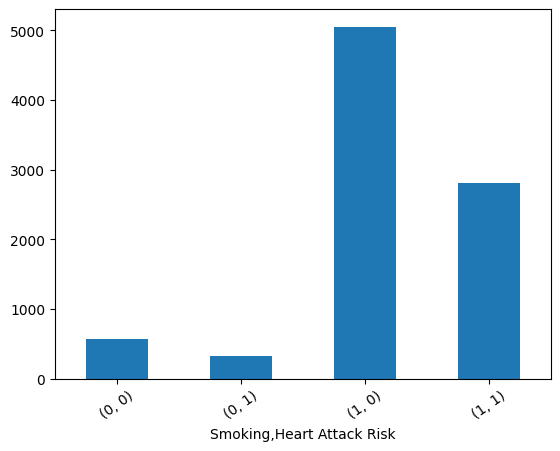

In [47]:
heart_attack.groupby('Smoking')['Heart Attack Risk'].value_counts().plot.bar()
plt.xticks(rotation=35)

Smoking does increase heart attack risk but not all the time as many more smokers are not at risk of getting a heart attack.

In [52]:
heart_attack[heart_attack['Age Group'].isin(['45-60','60-75','75+'])]['Diabetes'].value_counts()

Diabetes
1    3510
0    1908
Name: count, dtype: int64

In [53]:
heart_attack.groupby('Age Group')['Diabetes'].value_counts()

Age Group  Diabetes
0-25       1            555
           0            305
25-35      1            834
           0            407
35-45      1            817
           0            427
45-60      1           1136
           0            603
60-75      1           1150
           0            631
75+        1           1224
           0            674
Name: count, dtype: int64

In [55]:
heart_attack.groupby('Age Group')['Stress Level'].agg('mean')

Age Group
0-25     5.497674
25-35    5.345689
35-45    5.437299
45-60    5.415756
60-75    5.466592
75+      5.611697
Name: Stress Level, dtype: float64

<Axes: xlabel='Country,Smoking'>

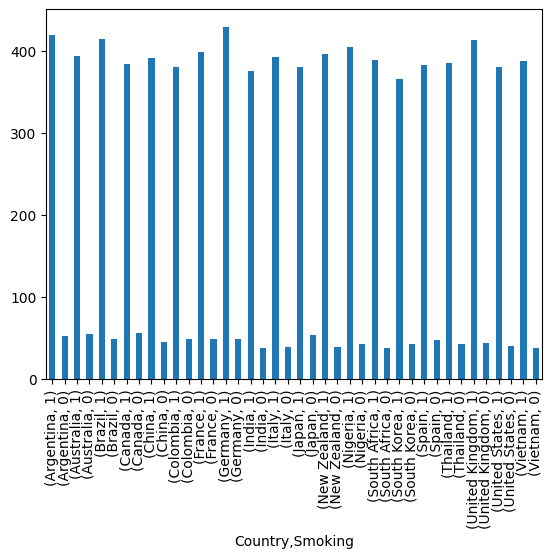

In [57]:
heart_attack.groupby('Country')['Smoking'].value_counts().plot.bar()

All countries have more smokers than non-smokers.

In [58]:
heart_attack.groupby('Family History')['Diabetes'].value_counts()

Family History  Diabetes
0               1           2927
                0           1516
1               1           2789
                0           1531
Name: count, dtype: int64

Diabetes - Whether the patient has diabetes (1: Yes, 0: No)
Family History - Family history of heart-related problems (1: Yes, 0: No)

Family history has no influence on diabetes.

<Axes: ylabel='Frequency'>

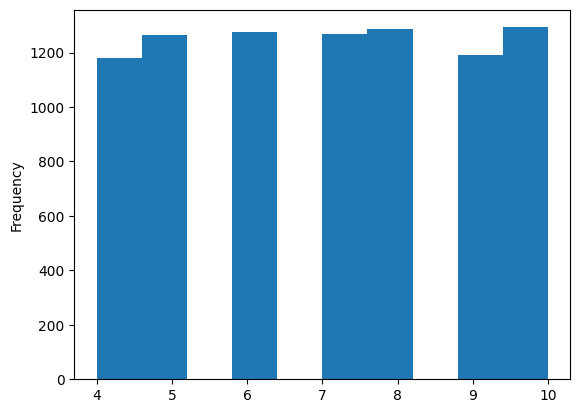

In [59]:
heart_attack['Sleep Hours Per Day'].plot.hist()

Uniform distribution of sleep hours.

(array([0, 1, 2]),
 [Text(0, 0, 'Healthy'), Text(1, 0, 'Average'), Text(2, 0, 'Unhealthy')])

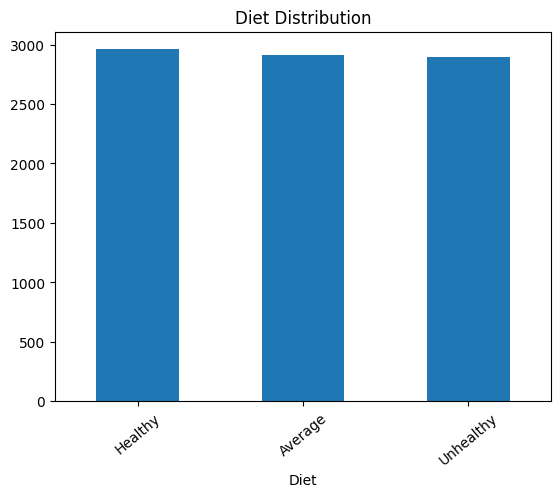

In [62]:
heart_attack['Diet'].value_counts().plot.bar()
plt.title('Diet Distribution')
plt.xticks(rotation=40)

Uniform Diet Distribution.

In [63]:
heart_attack.groupby('Diet')['Obesity'].value_counts()

Diet       Obesity
Average    1          1476
           0          1436
Healthy    1          1483
           0          1477
Unhealthy  0          1456
           1          1435
Name: count, dtype: int64

In [64]:
heart_attack.groupby('Diet')['Diabetes'].value_counts()

Diet       Diabetes
Average    1           1896
           0           1016
Healthy    1           1943
           0           1017
Unhealthy  1           1877
           0           1014
Name: count, dtype: int64

In [66]:
heart_attack.groupby('Diet')['Cholesterol'].agg('mean')

Diet
Average      260.117788
Healthy      258.706081
Unhealthy    260.833967
Name: Cholesterol, dtype: float64

In [67]:
heart_attack['Heart Rate'].value_counts(bins=10)

Heart Rate
(39.929, 47.0]    993
(82.0, 89.0]      891
(103.0, 110.0]    884
(47.0, 54.0]      874
(61.0, 68.0]      867
(89.0, 96.0]      863
(54.0, 61.0]      862
(96.0, 103.0]     858
(75.0, 82.0]      851
(68.0, 75.0]      820
Name: count, dtype: int64

In [69]:
heart_attack.groupby(['Smoking','Diabetes'])['Heart Rate'].agg('mean')

Smoking  Diabetes
0        0           74.247619
         1           76.582343
1        0           74.898609
         1           74.955530
Name: Heart Rate, dtype: float64